In [1]:
import live_trading_indicators as lti

indicators = lti.Indicators('binance')
ohlcv = indicators.OHLCV('ethusdt', '4h', '2022-07-01', '2022-07-01')
ohlcv

<OHLCV data> source: binance, symbol: ethusdt, timeframe: 4h
date: 2022-07-01T00:00 - 2022-07-01T20:00 (length: 6) 
empty bars: count 0 (0.00 %), max consecutive 0
Values: time, open, high, low, close, volume

In [2]:
dataframe = ohlcv.pandas()
dataframe.head()

,time,open,high,low,close,volume
0,2022-07-01 00:00:00,1071.02,1117.00,1050.46,1054.52,430646.8720
1,2022-07-01 04:00:00,1054.52,1076.43,1045.41,1066.81,275557.9328
2,2022-07-01 08:00:00,1066.81,1086.44,1033.44,1050.22,252105.5665
3,2022-07-01 12:00:00,1050.21,1074.23,1043.00,1056.86,298465.0695
4,2022-07-01 16:00:00,1056.86,1083.10,1054.82,1067.91,158796.2248


In [3]:
indicators = lti.Indicators('ccxt.bybit')
macd = indicators.MACD('ETHUSDT', '1h', '2022-07-01', '2022-07-30', period_short=15, period_long=26, period_signal=9)
macd[40:].pandas().head()

,time,macd,signal,hist
0,2022-07-02 16:00:00,-1.661969,-3.514499,1.852530
1,2022-07-02 17:00:00,-0.983912,-3.125461,2.141548
2,2022-07-02 18:00:00,-0.081701,-2.617233,2.535532
3,2022-07-02 19:00:00,0.464134,-2.064394,2.528529
4,2022-07-02 20:00:00,0.828222,-1.477419,2.305641


In [4]:
import pandas

dataframe = pandas.read_csv('ETHUSDT-1m-2022-08-15.zip', header=None)
dataframe.rename(columns={0: 'time', 1: 'open', 2: 'high', 3: 'low', 4: 'close', 5: 'volume', }, inplace=True)
indicators = lti.Indicators(dataframe)
macd = indicators.MACD(period_short=15, period_long=26, period_signal=9)
print(macd[40:].pandas().head())

                 time      macd    signal      hist
0 2022-08-15 00:40:00  3.403958  2.320975  1.082984
1 2022-08-15 00:41:00  3.540428  2.643593  0.896835
2 2022-08-15 00:42:00  3.594786  2.930063  0.664722
3 2022-08-15 00:43:00  3.684476  3.170449  0.514027
4 2022-08-15 00:44:00  3.763257  3.354183  0.409074


In [5]:
import datetime as dt

utcnow = dt.datetime.utcnow()
print(f'Now is {utcnow} UTC')
indicators = lti.Indicators('binance', utcnow - dt.timedelta(minutes=3))
ohlcv = indicators.OHLCV('btcusdt', '1m')
ohlcv.pandas()

Now is 2023-01-02 17:14:28.140709 UTC
2023-01-02 20:14:28:root:180356:175 INFO Download using binance symbol btcusdt timeframe 1m from 2023-01-02T00:00:00.000, bars: 1000
2023-01-02 20:14:29:root:180356:175 INFO Download using binance symbol btcusdt timeframe 1m from 2023-01-02T16:40:00.000, bars: 35


,time,open,high,low,close,volume
0,2023-01-02 17:11:00,16715.64,16716.04,16708.24,16710.53,111.88855
1,2023-01-02 17:12:00,16710.64,16712.34,16708.72,16710.83,53.01501
2,2023-01-02 17:13:00,16710.53,16711.46,16708.63,16710.64,69.10019


In [6]:
utcnow = dt.datetime.utcnow()
print(f'Now is {utcnow} UTC')
indicators = lti.Indicators('binance', utcnow - dt.timedelta(minutes=3))
ohlcv = indicators.OHLCV('btcusdt', '1m')
ohlcv.pandas()

Now is 2023-01-02 17:14:29.547180 UTC
2023-01-02 20:14:30:root:180356:175 INFO Download using binance symbol btcusdt timeframe 1m from 2023-01-02T00:00:00.000, bars: 1000
2023-01-02 20:14:30:root:180356:175 INFO Download using binance symbol btcusdt timeframe 1m from 2023-01-02T16:40:00.000, bars: 35


,time,open,high,low,close,volume
0,2023-01-02 17:11:00,16715.64,16716.04,16708.24,16710.53,111.88855
1,2023-01-02 17:12:00,16710.64,16712.34,16708.72,16710.83,53.01501
2,2023-01-02 17:13:00,16710.53,16711.46,16708.63,16710.64,69.10019


In [7]:
utcnow = dt.datetime.utcnow()
print(f'Now is {utcnow} UTC')
indicators = lti.Indicators('binance', utcnow - dt.timedelta(minutes=3), with_incomplete_bar=True)
ohlcv = indicators.OHLCV('btcusdt', '1m')
ohlcv.pandas()

Now is 2023-01-02 17:14:30.855116 UTC
2023-01-02 20:14:31:root:180356:175 INFO Download using binance symbol btcusdt timeframe 1m from 2023-01-02T00:00:00.000, bars: 1000
2023-01-02 20:14:32:root:180356:175 INFO Download using binance symbol btcusdt timeframe 1m from 2023-01-02T16:40:00.000, bars: 35


,time,open,high,low,close,volume
0,2023-01-02 17:11:00,16715.64,16716.04,16708.24,16710.53,111.88855
1,2023-01-02 17:12:00,16710.64,16712.34,16708.72,16710.83,53.01501
2,2023-01-02 17:13:00,16710.53,16711.46,16708.63,16710.64,69.10019
3,2023-01-02 17:14:00,16710.29,16716.66,16710.25,16715.97,67.96006


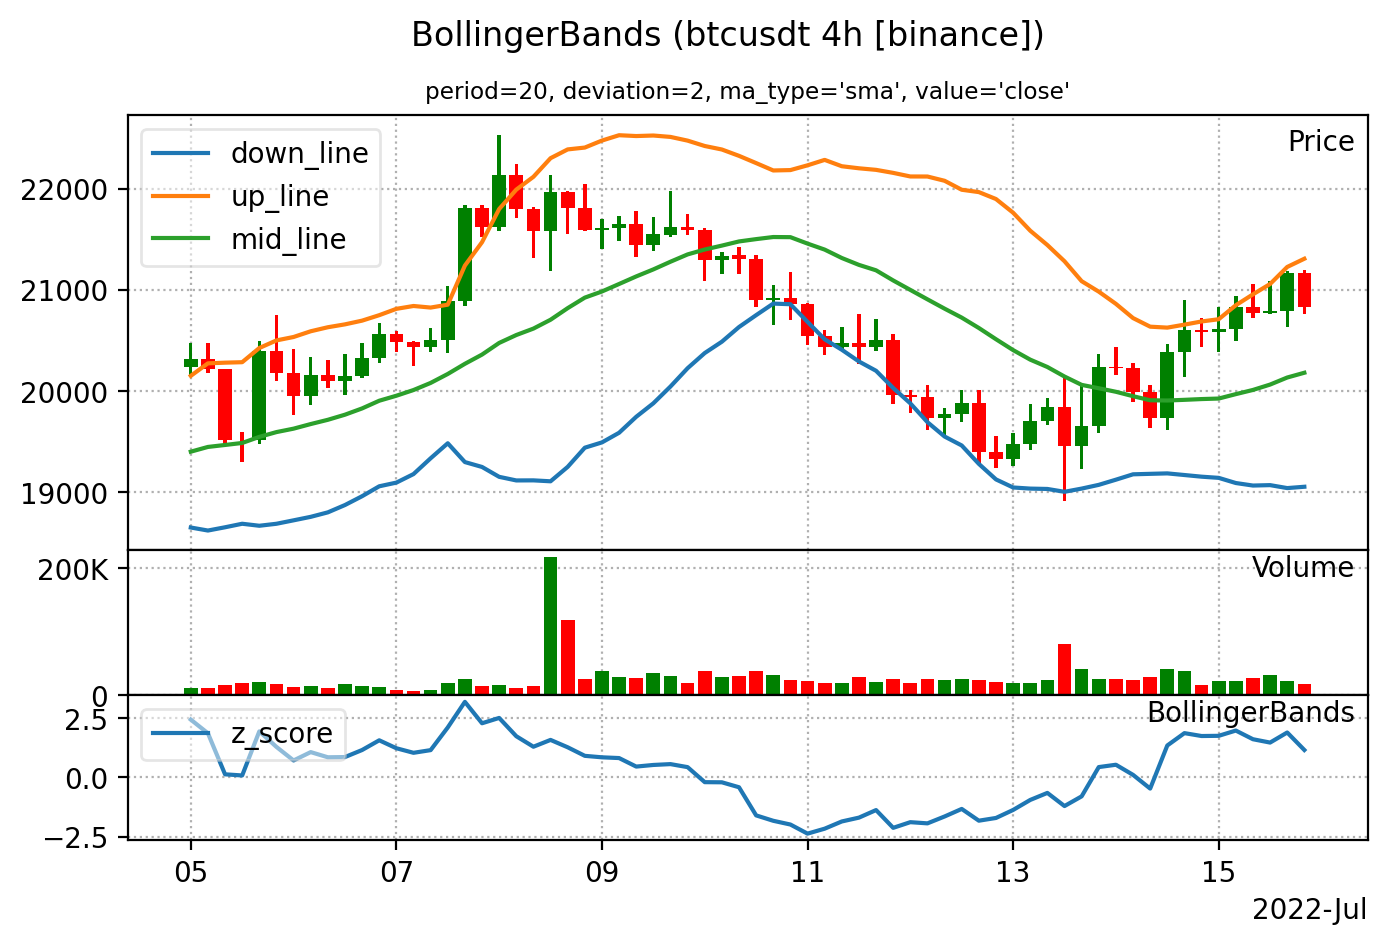

In [10]:
indicators = lti.Indicators('binance', '2022-07-01', '2022-07-15')
macd = indicators.BollingerBands('btcusdt', '4h', '2022-07-05', '2022-07-15')
macd.show()